# Exploratory Data Analysis

Importing the CSV

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the CSV file into a new DataFrame
merged_df = pd.read_csv('merged_df.csv')

# Display the first few rows of the DataFrame to check
print(merged_df.head())


         Date     Close      High       Low      Open     Volume  SMA_50  \
0  2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600     NaN   
1  2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800     NaN   
2  2010-01-06  6.348846  6.477045  6.342225  6.451465  552160000     NaN   
3  2010-01-07  6.337109  6.379843  6.291066  6.372319  477131200     NaN   
4  2010-01-08  6.379242  6.379844  6.291369  6.328685  447610800     NaN   

     EMA_50  RSI_14    EMA_12  ...  shortTermDebt  longTermDebt  \
0  6.440331     NaN  6.440331  ...   1.829000e+09           0.0   
1  6.440767     NaN  6.442044  ...   1.829000e+09           0.0   
2  6.437162     NaN  6.427706  ...   1.829000e+09           0.0   
3  6.433239     NaN  6.413768  ...   1.829000e+09           0.0   
4  6.431121     NaN  6.408456  ...   1.829000e+09           0.0   

   commonStockSharesOutstanding   netIncome      EPS    Total_Debt  DE_Ratio  \
0                   25840584000  3074000000  0.11896  1.8290

In [24]:
# Load the data
df = merged_df

#### Basic Information Function

In [25]:
# Basic information about the dataset
def basic_info(df):
    print("Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe())

basic_info(df)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          2516 non-null   object 
 1   Close                         2516 non-null   float64
 2   High                          2516 non-null   float64
 3   Low                           2516 non-null   float64
 4   Open                          2516 non-null   float64
 5   Volume                        2516 non-null   int64  
 6   SMA_50                        2467 non-null   float64
 7   EMA_50                        2516 non-null   float64
 8   RSI_14                        2503 non-null   float64
 9   EMA_12                        2516 non-null   float64
 10  EMA_26                        2516 non-null   float64
 11  MACD                          2516 non-null   float64
 12  SMA_20                        2497 non-null   fl

#### Correlation Heatmap with Interpretation

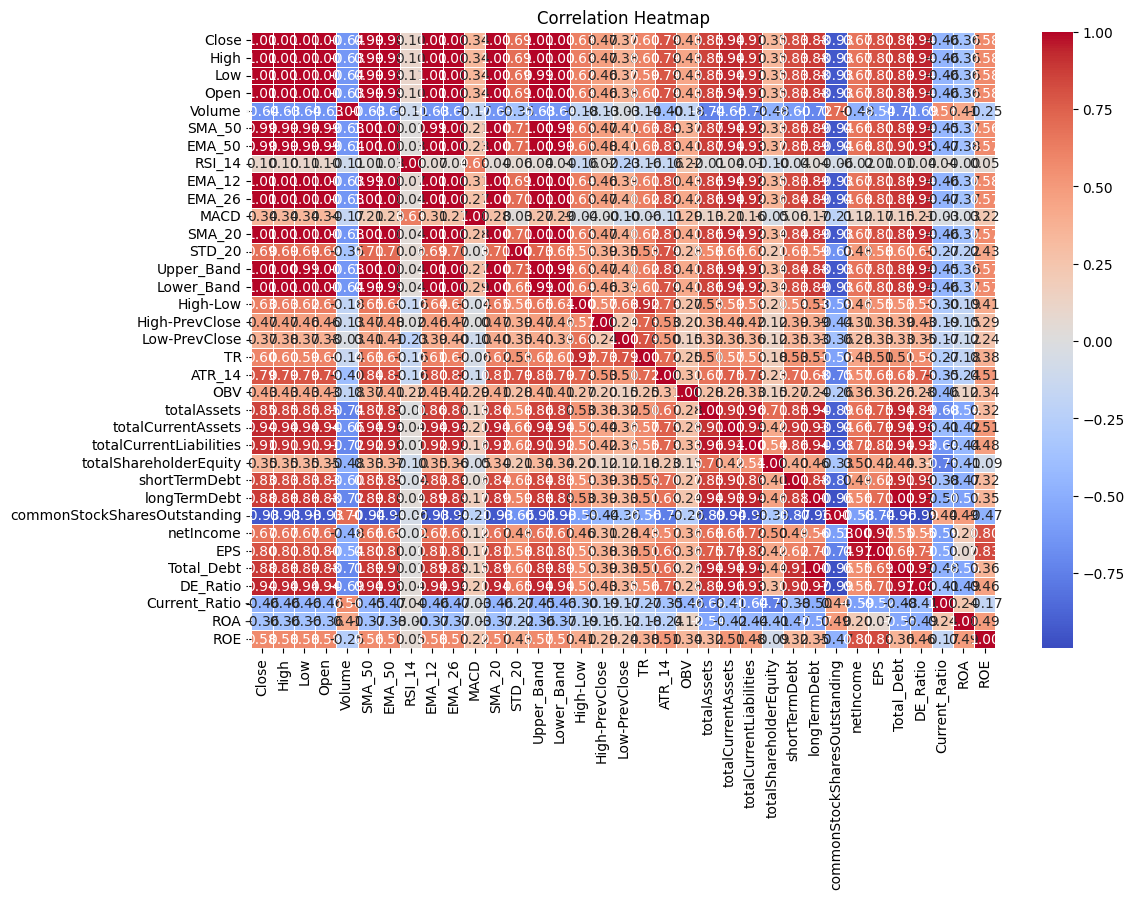


Interpretation: Correlation heatmaps help in identifying relationships between features.
1. Strong correlations (close to +1 or -1) indicate a strong relationship.
2. Positive correlation suggests that both variables move in the same direction, while negative correlation indicates opposite movement.
3. We look for features that are highly correlated with the target variable (e.g., 'Close').



In [26]:
# Correlation heatmap with automatic interpretation
def correlation_heatmap(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Compute the correlation matrix
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

    # Interpretation
    print("\nInterpretation: Correlation heatmaps help in identifying relationships between features.")
    print("1. Strong correlations (close to +1 or -1) indicate a strong relationship.")
    print("2. Positive correlation suggests that both variables move in the same direction, while negative correlation indicates opposite movement.")
    print("3. We look for features that are highly correlated with the target variable (e.g., 'Close').\n")

correlation_heatmap(df)


#### Numerical Distribution with Interpretation

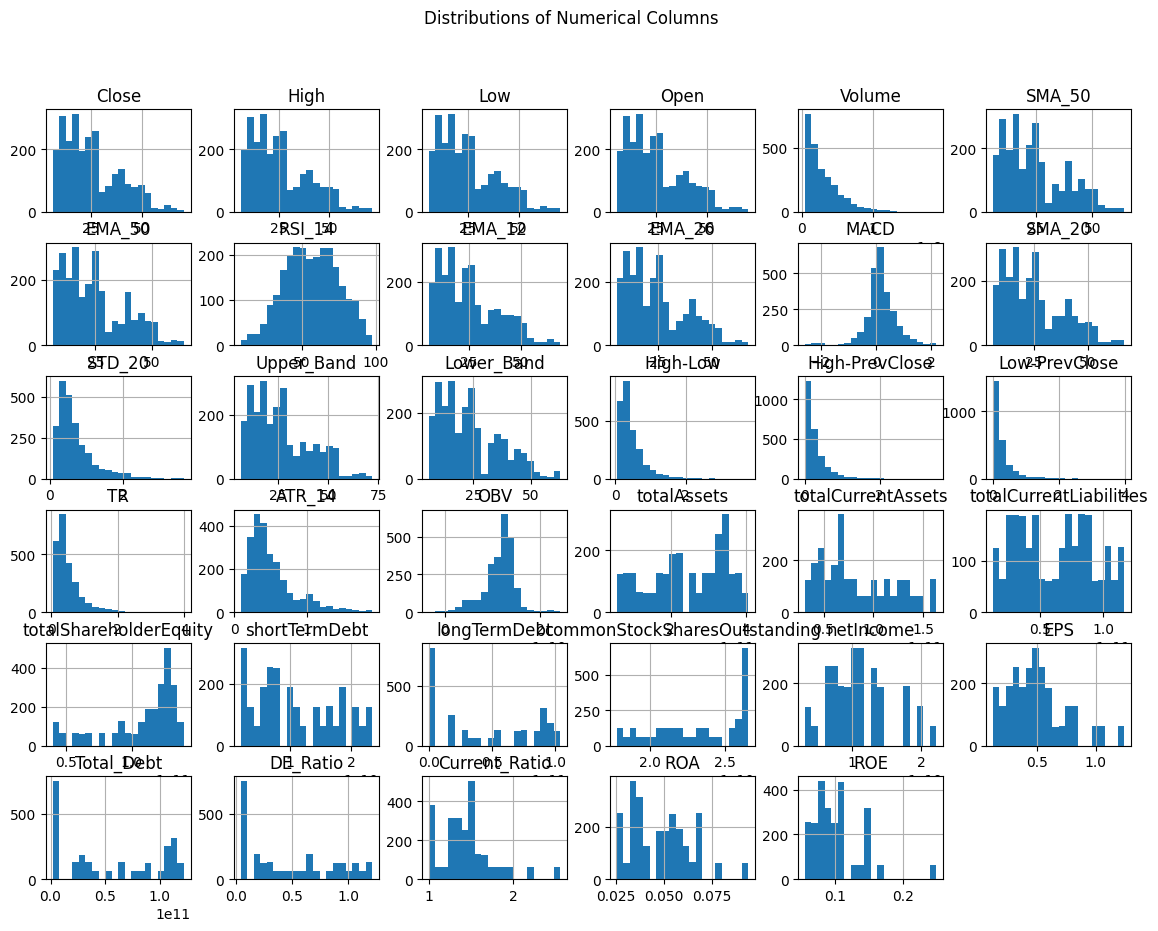


Interpretation: Histograms of numerical features help identify the distribution of each feature.
1. Skewness: A feature with a long tail on one side suggests skewness, which could indicate potential transformations.
2. Kurtosis: Features with higher peaks or fatter tails might have outliers or heavy tails.



In [27]:
# Distribution of numerical columns with interpretation
def numerical_distribution(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols].hist(bins=20, figsize=(14, 10))
    plt.suptitle("Distributions of Numerical Columns")
    plt.show()

    # Interpretation
    print("\nInterpretation: Histograms of numerical features help identify the distribution of each feature.")
    print("1. Skewness: A feature with a long tail on one side suggests skewness, which could indicate potential transformations.")
    print("2. Kurtosis: Features with higher peaks or fatter tails might have outliers or heavy tails.\n")

numerical_distribution(df)


#### Plotting Stock Trends with Interpretation

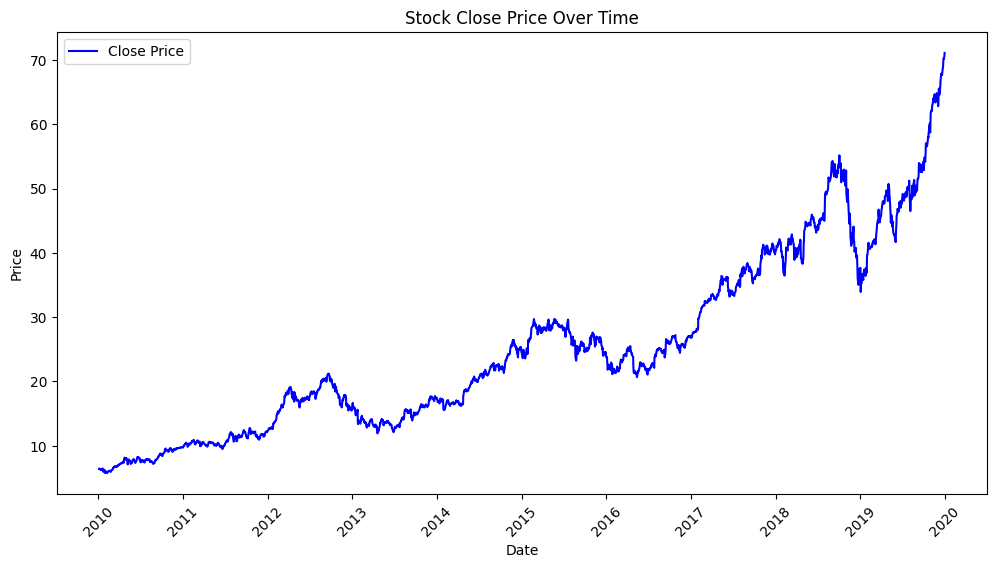


Interpretation: The trend of the 'Close' price over time reveals the overall movement of the stock.
1. A consistent upward or downward trend indicates a strong directional movement.
2. Large fluctuations or spikes may indicate periods of high volatility or market events.



In [28]:
# Plotting the trend of stock data (like Close price) with interpretation
def plot_stock_trends(df):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Close Price', color='b')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Close Price Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Interpretation
    print("\nInterpretation: The trend of the 'Close' price over time reveals the overall movement of the stock.")
    print("1. A consistent upward or downward trend indicates a strong directional movement.")
    print("2. Large fluctuations or spikes may indicate periods of high volatility or market events.\n")

plot_stock_trends(df)


 #### Plotting Moving Averages (SMA_50 and EMA_50) with Interpretation

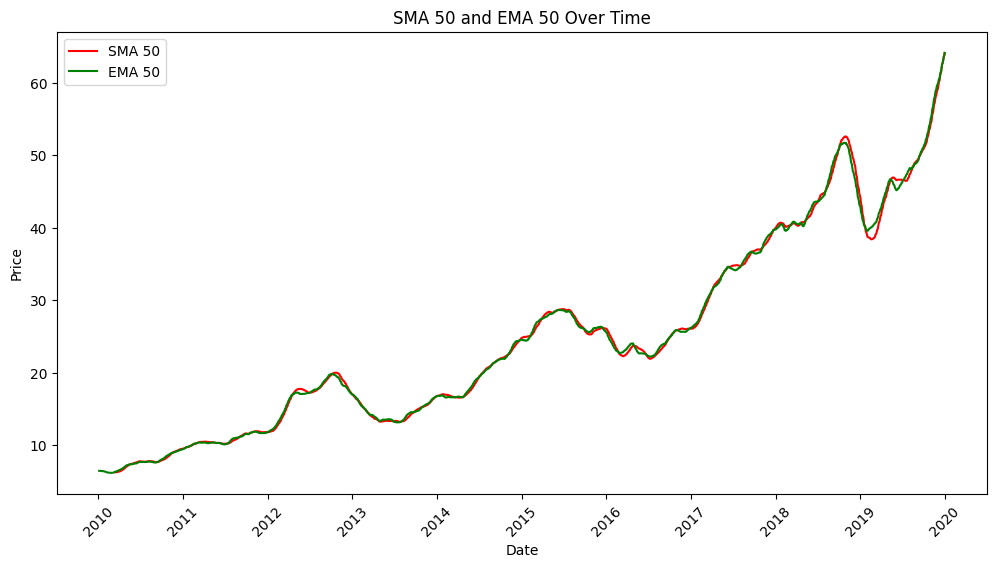


Interpretation: Moving averages smooth out price fluctuations.
1. The SMA (Simple Moving Average) is slower to react to price changes compared to the EMA (Exponential Moving Average).
2. A crossover between the two moving averages can signal potential buy or sell opportunities.



In [29]:
# Moving averages trend (SMA_50 and EMA_50) with interpretation
def plot_moving_averages(df):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df['Date']), df['SMA_50'], label='SMA 50', color='r')
    plt.plot(pd.to_datetime(df['Date']), df['EMA_50'], label='EMA 50', color='g')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('SMA 50 and EMA 50 Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Interpretation
    print("\nInterpretation: Moving averages smooth out price fluctuations.")
    print("1. The SMA (Simple Moving Average) is slower to react to price changes compared to the EMA (Exponential Moving Average).")
    print("2. A crossover between the two moving averages can signal potential buy or sell opportunities.\n")

plot_moving_averages(df)

#### Plotting RSI (Relative Strength Index) with Interpretation

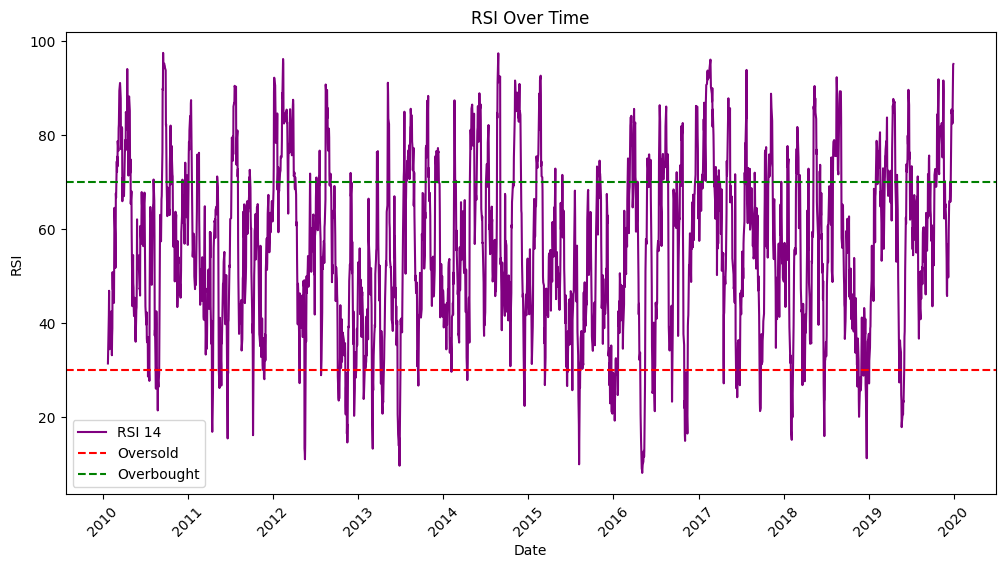


Interpretation: The RSI is a momentum indicator used to identify overbought or oversold conditions.
1. RSI values above 70 indicate the asset may be overbought, suggesting a potential price drop.
2. RSI values below 30 suggest the asset may be oversold, indicating a potential price increase.



In [30]:
# Plotting the RSI (Relative Strength Index) over time with interpretation
def plot_rsi(df):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df['Date']), df['RSI_14'], label='RSI 14', color='purple')
    plt.axhline(y=30, color='r', linestyle='--', label='Oversold')
    plt.axhline(y=70, color='g', linestyle='--', label='Overbought')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.title('RSI Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Interpretation
    print("\nInterpretation: The RSI is a momentum indicator used to identify overbought or oversold conditions.")
    print("1. RSI values above 70 indicate the asset may be overbought, suggesting a potential price drop.")
    print("2. RSI values below 30 suggest the asset may be oversold, indicating a potential price increase.\n")

plot_rsi(df)


#### Plotting Bollinger Bands with Interpretation

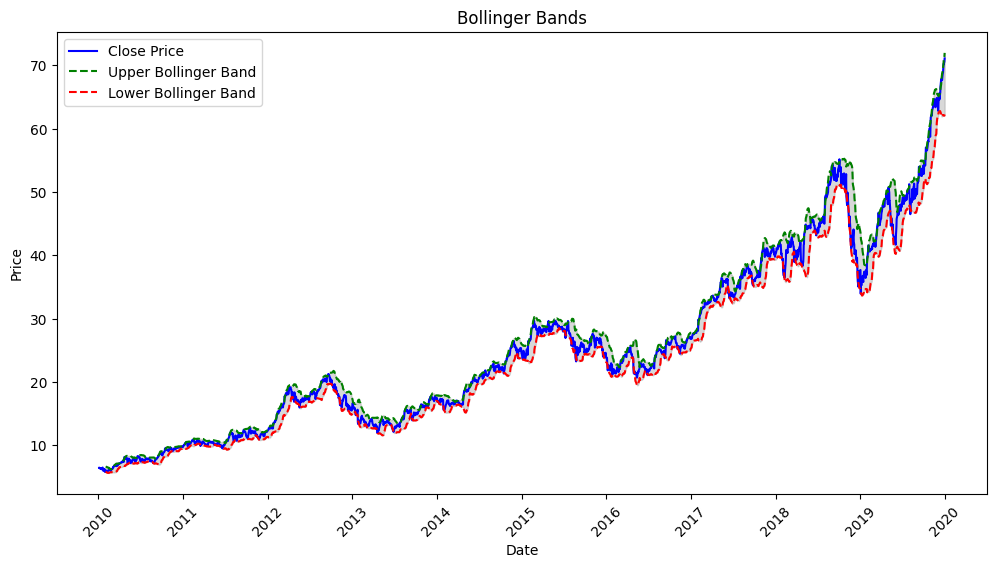


Interpretation: Bollinger Bands are used to measure volatility and potential price reversal points.
1. When the price reaches the upper band, the asset may be overbought, and when it touches the lower band, it may be oversold.
2. A price breaking out of the bands suggests high volatility or a trend continuation.



In [31]:
# Plotting the Bollinger Bands (Upper_Band and Lower_Band) with interpretation
def plot_bollinger_bands(df):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Close Price', color='b')
    plt.plot(pd.to_datetime(df['Date']), df['Upper_Band'], label='Upper Bollinger Band', color='g', linestyle='--')
    plt.plot(pd.to_datetime(df['Date']), df['Lower_Band'], label='Lower Bollinger Band', color='r', linestyle='--')
    plt.fill_between(pd.to_datetime(df['Date']), df['Lower_Band'], df['Upper_Band'], color='grey', alpha=0.3)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Bollinger Bands')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Interpretation
    print("\nInterpretation: Bollinger Bands are used to measure volatility and potential price reversal points.")
    print("1. When the price reaches the upper band, the asset may be overbought, and when it touches the lower band, it may be oversold.")
    print("2. A price breaking out of the bands suggests high volatility or a trend continuation.\n")

plot_bollinger_bands(df)


#### Plotting Debt Ratios (DE Ratio and Current Ratio) with Interpretation

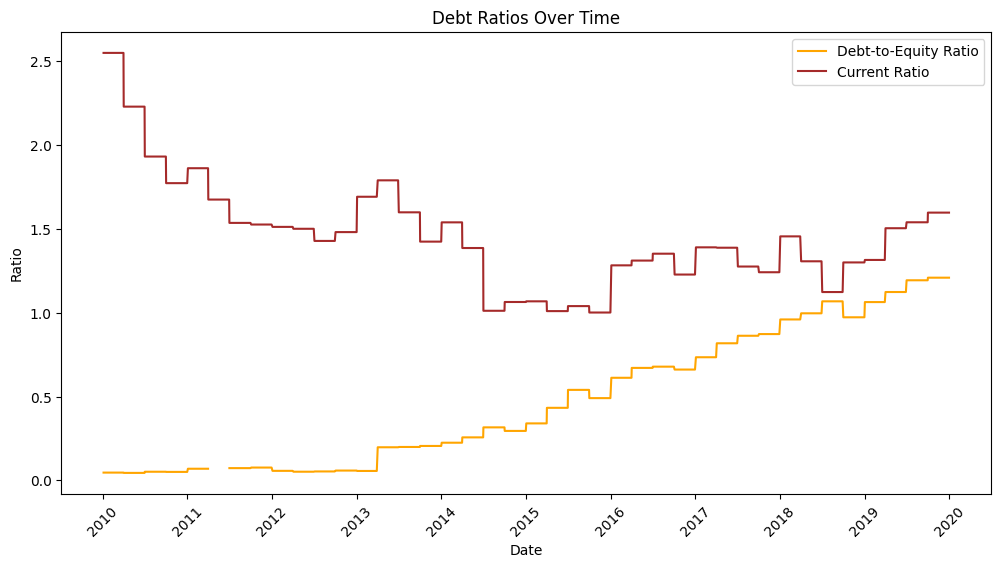


Interpretation: Debt ratios provide insights into a company’s financial health.
1. A high Debt-to-Equity ratio suggests higher financial leverage and risk.
2. A current ratio above 1 indicates the company can cover its short-term liabilities with current assets.



In [32]:
# Plotting Debt Ratios (DE Ratio and Current Ratio) with interpretation
def plot_debt_ratios(df):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df['Date']), df['DE_Ratio'], label='Debt-to-Equity Ratio', color='orange')
    plt.plot(pd.to_datetime(df['Date']), df['Current_Ratio'], label='Current Ratio', color='brown')
    plt.xlabel('Date')
    plt.ylabel('Ratio')
    plt.title('Debt Ratios Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Interpretation
    print("\nInterpretation: Debt ratios provide insights into a company’s financial health.")
    print("1. A high Debt-to-Equity ratio suggests higher financial leverage and risk.")
    print("2. A current ratio above 1 indicates the company can cover its short-term liabilities with current assets.\n")

plot_debt_ratios(df)

#### Volatility Analysis

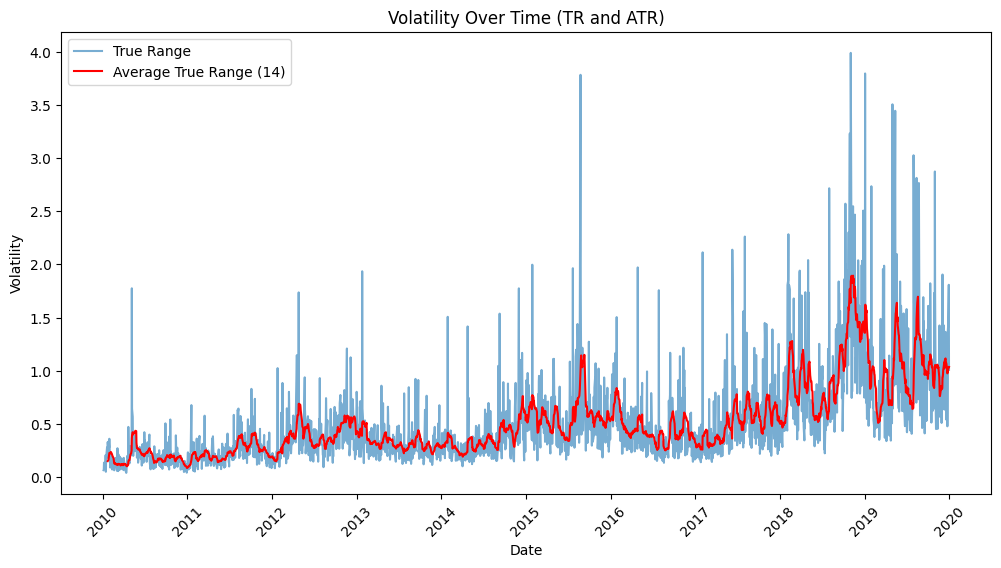


Interpretation: ATR and TR measure market volatility.
1. Sudden spikes in ATR/TR indicate volatile periods often associated with news or events.
2. Sustained high ATR levels may imply a trending market, while low values can signal consolidation.



In [33]:
def plot_volatility(df):
    plt.figure(figsize=(12, 6))
    plt.plot(pd.to_datetime(df['Date']), df['TR'], label='True Range', alpha=0.6)
    plt.plot(pd.to_datetime(df['Date']), df['ATR_14'], label='Average True Range (14)', color='red')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.title('Volatility Over Time (TR and ATR)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    print("\nInterpretation: ATR and TR measure market volatility.")
    print("1. Sudden spikes in ATR/TR indicate volatile periods often associated with news or events.")
    print("2. Sustained high ATR levels may imply a trending market, while low values can signal consolidation.\n")

plot_volatility(df)

#### Volume vs Price Analysis

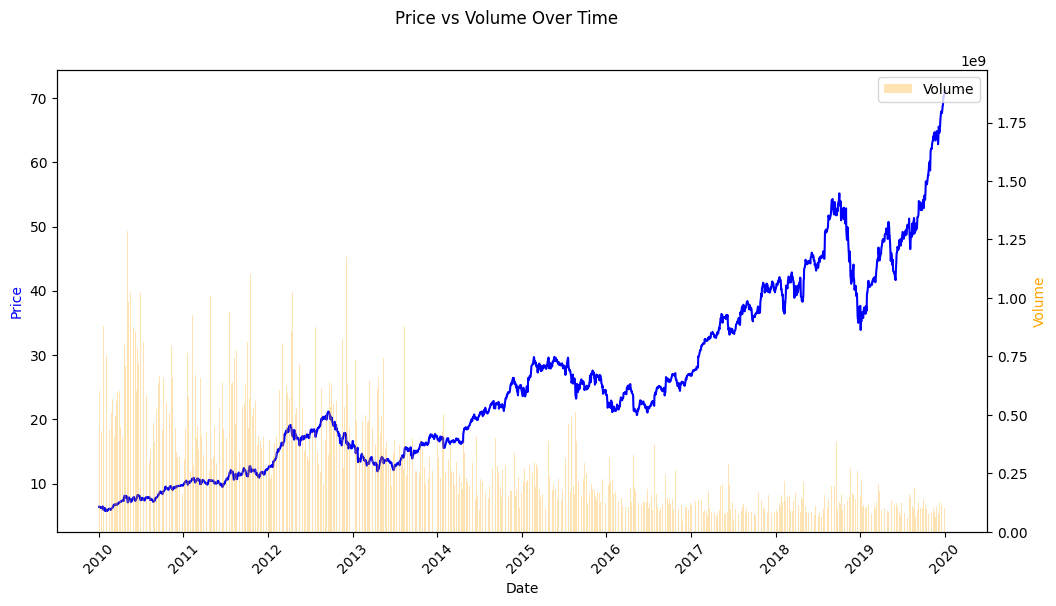


Interpretation: Comparing volume with price movements helps detect trend confirmations.
1. Price movements with high volume are more likely to sustain.
2. Divergence between volume and price may indicate weakening trends or false breakouts.



In [34]:
def plot_volume_price(df):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(pd.to_datetime(df['Date']), df['Close'], color='blue', label='Close Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price', color='blue')
    ax2 = ax1.twinx()
    ax2.bar(pd.to_datetime(df['Date']), df['Volume'], alpha=0.3, label='Volume', color='orange')
    ax2.set_ylabel('Volume', color='orange')
    fig.suptitle('Price vs Volume Over Time')
    ax1.tick_params(axis='x', rotation=45)
    plt.legend()
    plt.show()

    print("\nInterpretation: Comparing volume with price movements helps detect trend confirmations.")
    print("1. Price movements with high volume are more likely to sustain.")
    print("2. Divergence between volume and price may indicate weakening trends or false breakouts.\n")

plot_volume_price(df)